This Notebook entails importing survery data, the development of 3 classification algorithms, their hyperparameters tuning. It consists of the following steps:

- Feature Selection
- Hypothesis Testing
- Models
    - Logistic Regression
    - Random Forest
    - Extra Random Trees

<font color='red'>
## Section 1: Import, cleanse and organize

In [1]:
# Import necesary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from matplotlib import colors
from matplotlib import style
style.use('ggplot')
from seaborn import set_style
set_style("darkgrid")
import os
import xlrd
import scipy.stats as stats

In [2]:
# Customize pandas output
pd.set_option('display.height', 6000)
pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 150)
np.set_printoptions(suppress=True)

In [4]:
# Import csv-adjust accordingly 
dta_all = pd.read_csv('responses.csv')
dta_all.head(1)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats


In [5]:
# Insight
dta_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [14]:
# Summary
dta_all.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,1000.000000,1004.000000,1001.000000,1005.000000,1005.000000,1009.000000,1006.000000,1004.000000,1007.000000,1003.000000,1007.000000,1009.000000,1004.000000,995.000000,1006.000000,1003.000000,1008.000000,1008.000000,1004.000000,1002.000000,1006.000000,1007.000000,1006.00000,1007.000000,1009.000000,1008.000000,1007.000000,1005.000000,1010.000000,1007.000000,1009.000000,1009.000000,1009.000000,1007.000000,1003.000000,1005.000000,1007.000000,1005.000000,1007.000000,1003.000000,1006.000000,1009.000000,1006.000000,1004.000000,1006.000000,1009.000000,1003.000000,1006.000000,1007.000000,1005.000000,1006.000000,1006.000000,1005.000000,1010.000000,1004.000000,1003.000000,1008.000000,1009.000000,1006.000000,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,2.165000,3.159363,3.082917,3.778109,2.516418,2.256690,2.686879,2.589641,2.273088,3.686939,2.461768,2.324083,1.901394,3.387940,3.291252,1.907278,2.362103,3.276786,3.234064,3.024950,4.557654,2.948361,3.33499,2.061569

In [15]:
# Check data types
datatypes = dta_all.dtypes.tolist()
datatypes

[dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('floa

In [7]:
dta = dta_all

<font color='red'>
## Section 2: Exloratory Data Analysis

In [72]:
# Check for Null Values
dta.isnull().sum()

Music                         0
Slowsongsorfastsongs          0
Dance                         0
Folk                          0
Country                       0
Classicalmusic                0
Musical                       0
Pop                           0
Rock                          0
MetalorHardrock               0
Punk                          0
HiphopRap                     0
ReggaeSka                     0
SwingJazz                     0
Rocknroll                     0
Alternative                   0
Latino                        0
TechnoTrance                  0
Opera                         0
Movies                        0
Horror                        0
Thriller                      0
Comedy                        0
Romantic                      0
Scifi                         0
War                           0
FantasyFairytales             0
Animated                      0
Documentary                   0
Western                       0
Action                        0
History 

Show data shape and drop observations with null values

In [10]:
print(dta.shape)
dta = dta.dropna(axis=0, how='any')

(1010, 150)


In [11]:
dta.columns = dta.columns.str.replace(' ', '')
dta.columns = dta.columns.str.replace(',', '')
dta.columns = dta.columns.str.replace('-', '')
dta.columns = dta.columns.str.replace('/', '')
dta.columns = dta.columns.str.replace("'", "")

#### Now I'll replace categorical labels with integers so I can work with them

In [12]:

dta.Finances.loc[dta["Finances"] == 1.0] = 0
dta.Finances.loc[dta["Finances"] == 2.0] = 0
dta.Finances.loc[dta["Finances"] == 3.0] = 0
dta.Finances.loc[dta["Finances"] == 4.0] = 1
dta.Finances.loc[dta["Finances"] == 5.0] = 1

dta.Education.loc[dta["Education"] == 'currently a primary school pupil'] = 0
dta.Education.loc[dta["Education"] == 'primary school'] = 1
dta.Education.loc[dta["Education"] == 'secondary school'] = 2
dta.Education.loc[dta["Education"] == 'college/bachelor degree'] = 3
dta.Education.loc[dta["Education"] == 'masters degree'] = 4
dta.Education.loc[dta["Education"] == 'doctorate degree'] = 5

dta.Smoking.loc[dta["Smoking"]  == "never smoked"] = 0
dta.Smoking.loc[dta["Smoking"]  == "tried smoking"] = 1
dta.Smoking.loc[dta["Smoking"]  == "former smoker"] = 2
dta.Smoking.loc[dta["Smoking"]  == "current smoker"] = 3
        
dta.Alcohol.loc[dta["Alcohol"] == "never"] = 0
dta.Alcohol.loc[dta["Alcohol"]  == "drink a lot"] = 1
dta.Alcohol.loc[dta["Alcohol"]  == "social drinker"] = 2
        
dta.Houseblockofflats.loc[dta["Houseblockofflats"] == "block of flats"] = 0
dta.Houseblockofflats.loc[dta["Houseblockofflats"]  == "house/bungalow"] = 1
        
dta.Villagetown.loc[dta["Villagetown"] == "village"] = 0
dta.Villagetown.loc[dta["Villagetown"]  == "city"] = 1

dta.Punctuality.loc[dta["Punctuality"] == "i am often early"] = 0
dta.Punctuality.loc[dta["Punctuality"] == "i am always on time"] = 1
dta.Punctuality.loc[dta["Punctuality"] == "i am often running late"] = 2

dta.Gender.loc[dta["Gender"] == "female"] = 0
dta.Gender.loc[dta["Gender"]  == "male"] = 1

dta.Internetusage.loc[dta["Internetusage"] == "few hours a day"] = 0
dta.Internetusage.loc[dta["Internetusage"]  == "less than an hour a day"] = 1
dta.Internetusage.loc[dta["Internetusage"]  == "most of the day"] = 2

dta.Lying.loc[dta["Lying"] == "never"] = 0
dta.Lying.loc[dta["Lying"]  == "only to avoid hurting someone"] = 1
dta.Lying.loc[dta["Lying"] == "sometimes"] = 2
dta.Lying.loc[dta["Lying"]  == "everytime it suits me"] = 3

dta.Leftrighthanded.loc[dta["Leftrighthanded"] == "right handed"] = 0
dta.Leftrighthanded.loc[dta["Leftrighthanded"]  == "left handed"] = 1

dta.Onlychild.loc[dta["Onlychild"] == "no"] = 0
dta.Onlychild.loc[dta["Onlychild"]  == "yes"] = 1

/Users/askar/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/askar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/askar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/askar/anaconda/lib/python3.5/site-packages/ipyker

In [13]:
# Convert all values to Floats
for column in dta:
    dta[column] = dta[column].astype(float)

/Users/askar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [23]:
dta.head(3)

,Music,Slowsongsorfastsongs,Dance,Folk,Country,Classicalmusic,Musical,Pop,Rock,MetalorHardrock,Punk,HiphopRap,ReggaeSka,SwingJazz,Rocknroll,Alternative,Latino,TechnoTrance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Scifi,War,FantasyFairytales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,EconomyManagement,Biology,Chemistry,Reading,Geography,Foreignlanguages,Medicine,Law,Cars,Artexhibitions,Religion,Countrysideoutdoors,Dancing,Musicalinstruments,Writing,Passivesport,Activesport,Gardening,Celebrities,Shopping,Scienceandtechnology,Theatre,Funwithfriends,Adrenalinesports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerousdogs,Fearofpublicspeaking,Smoking,Alcohol,Healthyeating,Dailyevents,Prioritisingworkload,Writingnotes,Workaholism,Thinkingahead,Finaljudgement,Reliability,Keepingpromises,Lossofinterest,Friendsversusmoney,Funniness,Fake,Criminaldamage,Decisionmaking,Elections,Selfcriticism,Judgmentcalls,Hypochondria,Empathy,Eatingtosurvive,Giving,Compassiontoanimals,Borrowedstuff,Loneliness,Cheatinginschool,Health,Changingthepast,God,Dreams,Charity,Numberoffriends,Punctuality,Lying,Waiting,Newenvironment,Moodswings,Appearenceandgestures,Socializing,Achievements,Respondingtoaseriousletter,Children,Assertiveness,Gettingangry,Knowingtherightpeople,Publicspeaking,Unpopularity,Lifestruggles,Happinessinlife,Energylevels,Smallbigdogs,Personality,Findinglostvaluables,Gettingup,Interestsorhobbies,Parentsadvice,Questionnairesorpolls,Internetusage,Finances,Shoppingcentres,Brandedclothing,Entertainmentspending,Spendingonlooks,Spendingongadgets,Spendingonhealthyeating,Age,Height,Weight,Numberofsiblings,Gender,Leftrighthanded,Education,Onlychild,Villagetown,Houseblockofflats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5.0,3.0,1.0,3.0,2.0,0.0,1.0,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1.0,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4.0,2.0,3.0,1.0,0.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,0.0,0.0,4.0,5.0,3.0,3.0,1.0,3.0,20.0,163.0,48.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,1.0,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1.0,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3.0,1.0,3.0,0.0,2.0,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,0.0,0.0,4.0,1.0,4.0,2.0,5.0,2.0,19.0,163.0,58.0,2.0,0.0,0.0,3.0,0.0,1.0,0.0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5.0,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1.0,3.0,3.0,2.0,2.0,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,0.0,0.0,4.0,1.0,4.0,3.0,4.0,2.0,20.0,176.0,67.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0


Looks good. Now, a statistical insight

In [16]:
# Statistical insight
dta.describe()

,Music,Slowsongsorfastsongs,Dance,Folk,Country,Classicalmusic,Musical,Pop,Rock,MetalorHardrock,Punk,HiphopRap,ReggaeSka,SwingJazz,Rocknroll,Alternative,Latino,TechnoTrance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Scifi,War,FantasyFairytales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,EconomyManagement,Biology,Chemistry,Reading,Geography,Foreignlanguages,Medicine,Law,Cars,Artexhibitions,Religion,Countrysideoutdoors,Dancing,Musicalinstruments,Writing,Passivesport,Activesport,Gardening,Celebrities,Shopping,Scienceandtechnology,Theatre,Funwithfriends,Adrenalinesports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerousdogs,Fearofpublicspeaking,Smoking,Alcohol,Healthyeating,Dailyevents,Prioritisingworkload,Writingnotes,Workaholism,Thinkingahead,Finaljudgement,Reliability,Keepingpromises,Lossofinterest,Friendsversusmoney,Funniness,Fake,Criminaldamage,Decisionmaking,Elections,Selfcriticism,Judgmentcalls,Hypochondria,Empathy,Eatingtosurvive,Giving,Compassiontoanimals,Borrowedstuff,Loneliness,Cheatinginschool,Health,Changingthepast,God,Dreams,Charity,Numberoffriends,Punctuality,Lying,Waiting,Newenvironment,Moodswings,Appearenceandgestures,Socializing,Achievements,Respondingtoaseriousletter,Children,Assertiveness,Gettingangry,Knowingtherightpeople,Publicspeaking,Unpopularity,Lifestruggles,Happinessinlife,Energylevels,Smallbigdogs,Personality,Findinglostvaluables,Gettingup,Interestsorhobbies,Parentsadvice,Questionnairesorpolls,Internetusage,Finances,Shoppingcentres,Brandedclothing,Entertainmentspending,Spendingonlooks,Spendingongadgets,Spendingonhealthyeating,Age,Height,Weight,Numberofsiblings,Gender,Leftrighthanded,Education,Onlychild,Villagetown,Houseblockofflats
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.00000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.00000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,4.762611,3.295252,3.078635,2.264095,2.117211,2.982196,2.759644,3.451039,3.787834,2.354599,2.448071,2.885757,2.768546,2.759644,3.163205,2.879822,2.813056,2.305638,2.160237,4.639466,2.737389,3.370920,4.514837,3.473294,3.126113,3.188427,3.778932,3.805638,3.635015,2.099407,3.556380,3.228487,3.139466,2.632047,2.399110,2.099407,4.186944,3.127596,2.654303,2.633531,2.135015,3.203264,3.112760,3.818991,2.488131,2.232938,2.642433,2.614243,2.229970,3.608309,2.39911,2.298220,1.873887,3.396142,3.244807,1.876855,2.324926,3.267062,3.277448,3.026706,4.551929,2.894659,3.327893,1.991098,1.936202

### Let's see how Age, Education Level, and other factors compare by Gender..

In [17]:
print(dta.groupby("Gender").Age.mean())
print(dta.groupby("Gender").Education.describe())

Gender
0.0    20.052239
1.0    20.797794
Name: Age, dtype: float64
        count      mean       std  min  25%  50%  75%  max
Gender                                                    
0.0     402.0  2.253731  0.747597  0.0  2.0  2.0  3.0  4.0
1.0     272.0  2.345588  0.752645  1.0  2.0  2.0  3.0  5.0


In [23]:
dta.groupby("Gender").describe()

Achievements                                              Action                                              Activesport            \
              count      mean       std  min  25%  50%  75%  max  count      mean       std  min  25%  50%  75%  max       count      mean   
Gender                                                                                                                                       
0.0           402.0  2.970149  0.873040  1.0  3.0  3.0  3.0  5.0  402.0  3.141791  1.211868  1.0  2.0  3.0  4.0  5.0       402.0  2.995025   
1.0           272.0  3.058824  0.966331  1.0  2.0  3.0  4.0  5.0  272.0  4.169118  0.937573  1.0  4.0  4.0  5.0  5.0       272.0  3.613971   

                                          Adrenalinesports                                                 Age                                   \
             std  min  25%  50%  75%  max            count      mean       std  min  25%  50%  75%  max  count       mean       std   min   25%   
Gender                                                                                                                                            
0.0     1.476322  1.0  2.0  3.0  4.0  5.0            402.0  2.691542  1.374647  1.0  1.0  3.0  4.0  5.0  402.0  20.052239  2.632950  15.0  18.0   
1.0     1.478589  1.0  3.0  4.0  5.0  5.0            272.0  3.194853  1.409866  1.0  2.0  3.0  4.0  5.0  272.0  20.797794  2.820509  15.0  19.0   

                         Ageing                                              Alcohol                                              Alternative  \
         50%   75%   max  count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max       count   
Gender                                                                                                                                          
0.0     20.0  21.0  30.0  402.0  2.699005  1.371767  1.0  1.0  3.0  4.0  5.0   402.0  1.616915  0.660622  0.0  1.0  2.0  2.0  2.0       402.0   
1.0     20.0  22.0  30.0  272.0  2.286765  1.322014  1.0  1.0  2.0  3.0  5.0   272.0  1.466912  0.702400  0.0  1.0  2.0  2.0  2.0       272.0   

                                                    Animated                                               Appearenceandgestures            \
            mean       std  min  25%  50%  75%  max    count      mean       std  min   25%  50%  75%  max                 count      mean   
Gender                                                                                                                                       
0.0     2.883085  1.354318  1.0  2.0  3.0  4.0  5.0    402.0  4.019900  1.136386  1.0  3.00  4.0  5.0  5.0                 402.0  3.684080   
1.0     2.875000  1.310967  1.0  2.0  3.0  4.0  5.0    272.0  3.488971  1.256668  1.0  2.75  4.0  5.0  5.0                 272.0  3.455882   

                                          Artexhibitions                                              Assertiveness                                \
             std  min  25%  50%  75%  max          count      mean       std  min  25%  50%  75%  max         count      mean       std  min  25%   
Gender                                                                                                                                              
0.0     0.888943  1.0  3.0  4.0  4.0  5.0          402.0  2.860697  1.349424  1.0  2.0  3.0  4.0  5.0         402.0  3.430348  1.119483  1.0  3.0   
1.0     0.974718  1.0  3.0  3.0  4.0  5.0          272.0  2.250000  1.188816  1.0  1.0  2.0  3.0  5.0         272.0  3.525735  1.079531  1.0  3.0   

                      Biology                                              Borrowedstuff                                               \
        50%  75%  max   count      mean       std  min  25%  50%  75%  max         count      mean       std  min  25%  50%  75%  max   
Gender                                                                                                 

In this survey population
- 59% of the population are females
- Avg population age is 20.4, avg female age: 20.145422, and avg male age: 20.841837
- On average more males are phobic than females
- On average, more females are into Arts than males, whereas more men are into Hard Sciences and Computer Sciences
- On average, female save more than males, whereas males are noticeably more into sports than females
- Interest in music and moveis is roughly equally distributed among males and females
- On average, Women tend to do slightly better on saving money than men

### Similarly with Education

In [24]:
dta.groupby("Education").describe()

Achievements                                                Action                                               Activesport            \
                 count      mean       std  min   25%  50%   75%  max  count      mean       std  min  25%  50%   75%  max       count      mean   
Education                                                                                                                                          
0.0                2.0  3.500000  0.707107  3.0  3.25  3.5  3.75  4.0    2.0  3.000000  1.414214  2.0  2.5  3.0  3.50  4.0         2.0  5.000000   
1.0               53.0  3.018868  0.909154  1.0  3.00  3.0  3.00  5.0   53.0  3.358491  1.287429  1.0  2.0  3.0  4.00  5.0        53.0  3.320755   
2.0              424.0  2.950472  0.899119  1.0  2.00  3.0  3.00  5.0  424.0  3.601415  1.196566  1.0  3.0  4.0  5.00  5.0       424.0  3.183962   
3.0              140.0  3.107143  0.934521  1.0  3.00  3.0  4.00  5.0  140.0  3.557143  1.224871  1.0  3.0  4.0  5.00  5.0       140.0  3.357143   
4.0               52.0  3.057692  0.894722  1.0  3.00  3.0  3.00  5.0   52.0  3.403846  1.332249  1.0  3.0  4.0  4.25  5.0        52.0  3.326923   
5.0                3.0  4.666667  0.577350  4.0  4.50  5.0  5.00  5.0    3.0  3.666667  0.577350  3.0  3.5  4.0  4.00  4.0         3.0  2.666667   

                                             Adrenalinesports                                                 Age                                    \
                std  min  25%  50%  75%  max            count      mean       std  min  25%  50%  75%  max  count       mean       std   min    25%   
Education                                                                                                                                             
0.0        0.000000  5.0  5.0  5.0  5.0  5.0              2.0  3.000000  1.414214  2.0  2.5  3.0  3.5  4.0    2.0  15.500000  0.707107  15.0  15.25   
1.0        1.566151  1.0  2.0  3.0  5.0  5.0             53.0  3.075472  1.412160  1.0  2.0  3.0  4.0  5.0   53.0  17.547170  1.338283  15.0  17.00   
2.0        1.523380  1.0  2.0  3.0  5.0  5.0            424.0  2.804245  1.382731  1.0  2.0  3.0  4.0  5.0  424.0  19.808962  2.013856  15.0  19.00   
3.0        1.429753  1.0  2.0  4.0  5.0  5.0            140.0  3.128571  1.487806  1.0  2.0  3.0  5.0  5.0  140.0  21.128571  2.253192  16.0  19.00   
4.0        1.543121  1.0  2.0  4.0  5.0  5.0             52.0  2.807692  1.358177  1.0  1.0  3.0  4.0  5.0   52.0  25.461538  2.803790  19.0  23.75   
5.0        1.154701  2.0  2.0  2.0  3.0  4.0              3.0  3.000000  2.000000  1.0  2.0  3.0  4.0  5.0    3.0  25.333333  1.527525  24.0  24.50   

                             Ageing                                              Alcohol                                              Alternative  \
            50%    75%   max  count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max       count   
Education                                                                                                                                           
0.0        15.5  15.75  16.0    2.0  2.000000  1.414214  1.0  1.5  2.0  2.5  3.0     2.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0         2.0   
1.0        18.0  18.00  23.0   53.0  3.037736  1.518631  1.0  1.0  3.0  4.0  5.0    53.0  1.490566  0.775159  0.0  1.0  2.0  2.0  2.0        53.0   
2.0        20.0  21.00  30.0  424.0  2.471698  1.327701  1.0  1.0  2.0  3.0  5.0   424.0  1.575472  0.676497  0.0  1.0  2.0  2.0  2.0       424.0   
3.0        21.0  23.00  29.0  140.0  2.457143  1.395633  1.0  1.0  2.0  3.0  5.0   140.0  1.600000  0.585189  0.0  1.0  2.0  2.0  2.0       140.0   
4.0        25.0  28.00  30.0   52.0  2.769231  1.337475  1.0  2.0  3.0  4.0  5.0    52.0  1.442308  0.777463  0.0  1.0  2.0  2.0  2.0        52.0   
5.0        25.0  26.00  27.0    3.0  2.000000  1.732051  1.0  1.0  1.0  2.5  4.0     3.0  1.000000  1.000000  0.0  0.5  1.0  

In this survey population:
    - The majority of the populations' highest education is a high school degree, followed by Master's, then primary school
    - On average, there's no significant difference between savings for each group that holds a specific degree  
    - Surprisingly, the average interst in Computer Sciences is highest for those who are currently a primary school pupil

In [28]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 1009
Columns: 150 entries, Music to Houseblockofflats
dtypes: float64(150)
memory usage: 795.1 KB


### Show correlation between variables

In [25]:
corr = dta.corr()
corr

,Music,Slowsongsorfastsongs,Dance,Folk,Country,Classicalmusic,Musical,Pop,Rock,MetalorHardrock,Punk,HiphopRap,ReggaeSka,SwingJazz,Rocknroll,Alternative,Latino,TechnoTrance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Scifi,War,FantasyFairytales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,EconomyManagement,Biology,Chemistry,Reading,Geography,Foreignlanguages,Medicine,Law,Cars,Artexhibitions,Religion,Countrysideoutdoors,Dancing,Musicalinstruments,Writing,Passivesport,Activesport,Gardening,Celebrities,Shopping,Scienceandtechnology,Theatre,Funwithfriends,Adrenalinesports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerousdogs,Fearofpublicspeaking,Smoking,Alcohol,Healthyeating,Dailyevents,Prioritisingworkload,Writingnotes,Workaholism,Thinkingahead,Finaljudgement,Reliability,Keepingpromises,Lossofinterest,Friendsversusmoney,Funniness,Fake,Criminaldamage,Decisionmaking,Elections,Selfcriticism,Judgmentcalls,Hypochondria,Empathy,Eatingtosurvive,Giving,Compassiontoanimals,Borrowedstuff,Loneliness,Cheatinginschool,Health,Changingthepast,God,Dreams,Charity,Numberoffriends,Punctuality,Lying,Waiting,Newenvironment,Moodswings,Appearenceandgestures,Socializing,Achievements,Respondingtoaseriousletter,Children,Assertiveness,Gettingangry,Knowingtherightpeople,Publicspeaking,Unpopularity,Lifestruggles,Happinessinlife,Energylevels,Smallbigdogs,Personality,Findinglostvaluables,Gettingup,Interestsorhobbies,Parentsadvice,Questionnairesorpolls,Internetusage,Finances,Shoppingcentres,Brandedclothing,Entertainmentspending,Spendingonlooks,Spendingongadgets,Spendingonhealthyeating,Age,Height,Weight,Numberofsiblings,Gender,Leftrighthanded,Education,Onlychild,Villagetown,Houseblockofflats
Music,1.000000,0.079243,0.079587,0.065234,0.004119,0.092681,0.065404,0.053930,0.162643,0.020999,0.084596,0.062623,0.039235,0.092354,0.112154,0.128613,0.058902,0.058988,0.062045,0.187255,0.003574,0.026031,0.074954,0.057586,0.009931,0.030227,0.085984,0.067727,-0.032272,-0.072108,-0.026626,0.068388,0.066803,-0.044324,-0.108090,-0.056190,0.087685,-0.024043,-0.069452,0.055525,0.004754,0.099445,0.009811,0.129040,0.069294,-0.017594,0.010225,0.061071,0.020445,0.067690,0.122172,0.136166,0.063619,-0.013482,0.018517,-0.012290,0.039281,0.131184,0.032464,0.086818,0.240069,0.033932,0.058711,0.005469,0.032502,0.040127,-0.060165,0.051596,0.039426,0.040659,0.020527,-0.002785,0.027737,0.087462,0.007411,0.056110,0.060210,-0.057168,0.044466,0.003453,-0.034251,-0.004259,0.015044,-0.014642,0.016259,0.037129,0.016188,-0.047881,0.042028,0.044717,0.023855,0.014476,0.042241,-0.001109,0.118749,-0.094154,0.037304,0.116783,0.091659,0.040098,0.050369,-0.017116,0.016533,-0.041115,0.010769,-0.002742,0.108703,0.117546,0.051670,0.033583,0.027471,-0.015391,0.079792,0.102758,0.038209,0.006704,0.110186,0.063419,0.042614,0.017691,-0.020456,0.019926,0.045348,0.050921,0.070432,-0.030906,0.027919,0.025814,0.096897,0.097611,0.021573,0.106391,-0.073105,-0.024049,0.109672,-0.041573,0.056335,0.098069,0.003892,0.063517,-0.074516,-0.067718,-0.101602,-0.000119,-0.109057,-0.017536,-0.061501,-0.030880,-0.048039,0.025414
Slowsongsorfastsongs,0.079243,1.000000,0.122408,-0.069242,-0.109378,-0.155253,-0.093498,0.024410,0.011693,0.064762,0.056187,0.098162,0.026369,-0.124804,-0.006935,-0.004311,-0.028030,0.145749,-0.160950,-0.014907,0.102742,0.072763,0.056445,-0.141518,0.042856,0.021685,-0.098062,-0.066638,-0.014016,0.028907,0.097006,0.002264,-0.049079,0.011907,0.045257,0.013777,0.046812,0.080818,0.010558,0.023130,0.001546,-0.067979,0.066254,-0.041501,-0.015545,-0.000534,0.063557,-0.107781,-0.009573,-0.039540,0.007289,-0.082614,-0.079524,0.047834,0.075922,0.026579,-0.006844,-0.019026,0.018926,-0.118211,0.055765,0.140338,0.070688,-0.049548,-0.005425,-0.061668,0.009730,-0.089619,-0.083911,-0.073074,-0.106606,-0.088136,-0.088800,0.054639,-0.018416,0.029456,0.053519,-0.014687,-0.103556,-0.060251,-0.050795,-0.075030,-0.004835,0.024963,0.099208,-0.081339,-0.022901

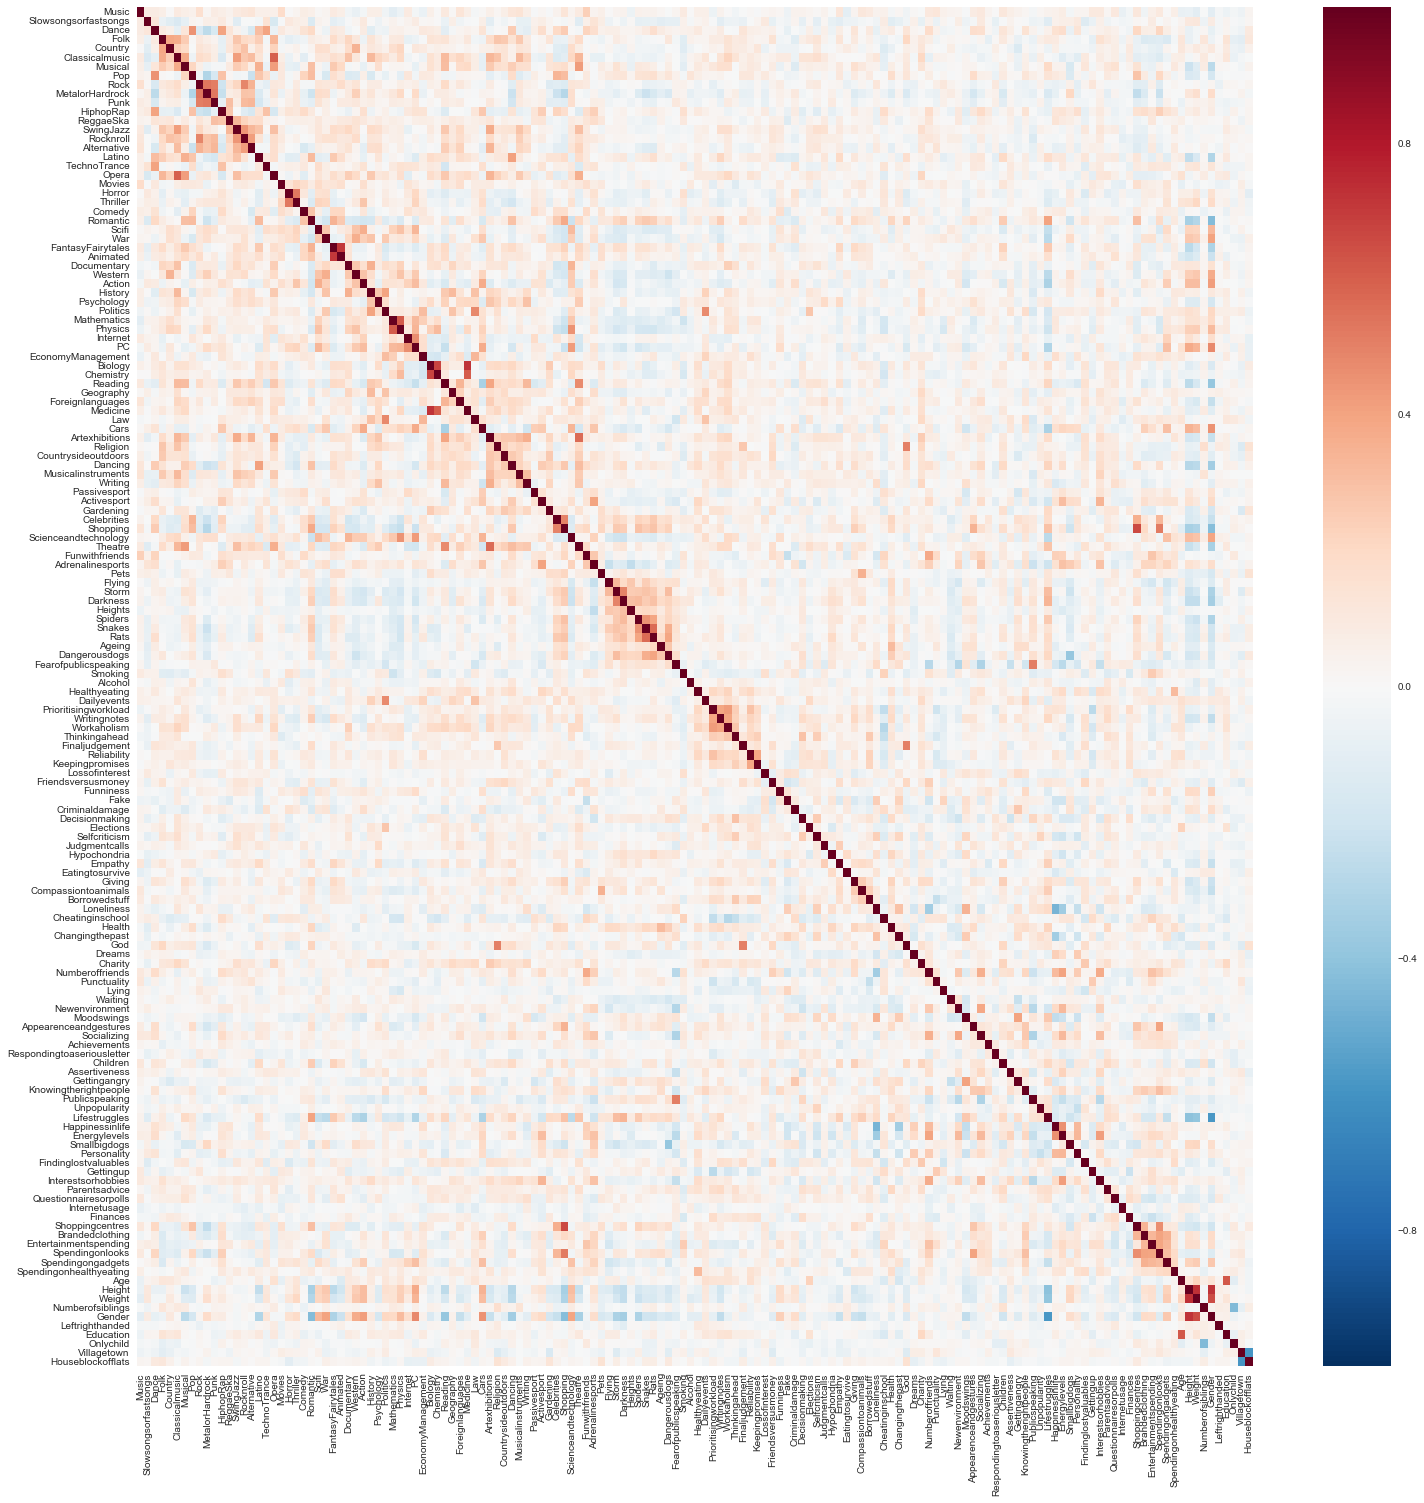

In [26]:
# Plot correlation
import seaborn as sns
fig, ax = plt.subplots(figsize=(25,25))
corr = dta.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


### Explatory Data Analysis plots

/Users/askar/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


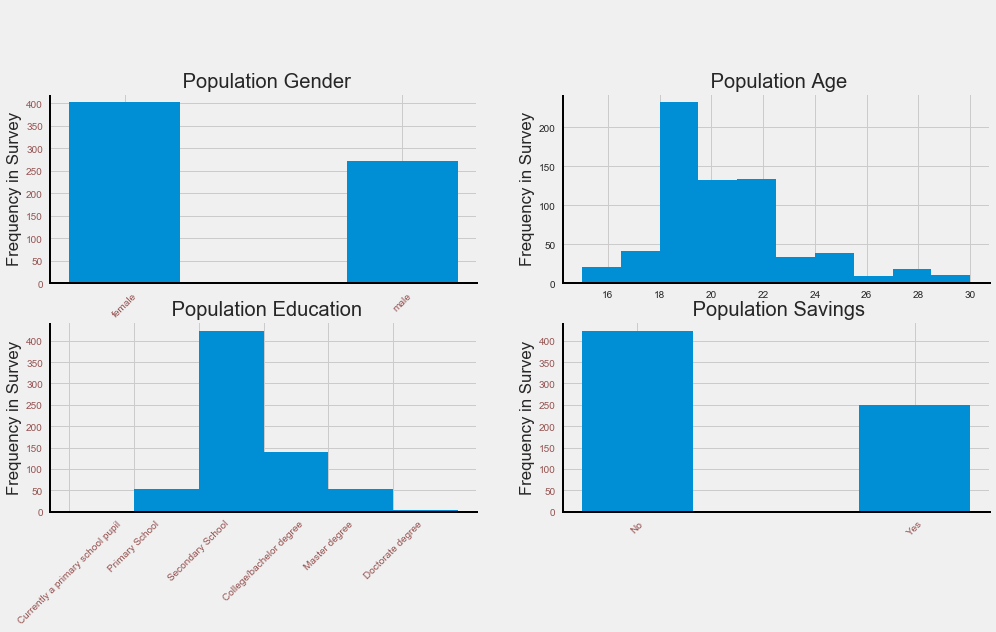

In [29]:
style.use('fivethirtyeight')
fig = plt.figure(); plt.figure(figsize=(15,15))

ax1 = plt.subplot2grid((4,2), (0,0), rowspan=1, colspan=1)

GenderList = ["female", "male"]; Gender_index = [0,1]
n, bins, patches = ax1.hist([dta.Gender], bins=[-0.2, 0.2, 0.8, 1.2])
plt.xticks(Gender_index, GenderList);plt.title("\n \n \n Population Gender");plt.ylabel("Frequency in Survey")

# Spines
ax1.spines['left'].set_color('k');ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_color('k');ax1.spines['bottom'].set_linewidth(2)

# Customize labels
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_color('#955351')
for label in ax1.yaxis.get_ticklabels():
    label.set_color('#955351')

ax2 = plt.subplot2grid((4,2), (0,1), rowspan=1, colspan=1)

n, bins, patches = ax2.hist([dta.Age])
plt.title("\n \n \n Population Age");plt.ylabel("Frequency in Survey")

# Spines
ax2.spines['left'].set_color('k');ax2.spines['left'].set_linewidth(2)
ax2.spines['bottom'].set_color('k');ax2.spines['bottom'].set_linewidth(2)

eduList_n = ["Currently a primary school pupil", "Primary School", "Secondary School", 
                 "College/bachelor degree", "Master degree", "Doctorate degree"]
ax3 = plt.subplot2grid((4,2), (1,0), rowspan=1, colspan=1)
eduIndex = [0,1,2,3,4,5]
n, bins, patches = ax3.hist([dta.Education], bins=[0,1,1,2,2,3,3,4,4,5,5,6])
plt.xticks(eduIndex, eduList_n);
plt.title("\n \n \n Population Education");plt.ylabel("Frequency in Survey")

# Spines
ax3.spines['left'].set_color('k');ax3.spines['left'].set_linewidth(2)
ax3.spines['bottom'].set_color('k');ax3.spines['bottom'].set_linewidth(2)

# Customize labels
for label in ax3.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_color('#955351')
for label in ax3.yaxis.get_ticklabels():
    label.set_color('#955351')

ax4 = plt.subplot2grid((4,2), (1,1), rowspan=1, colspan=1)

#n, bins, patches = ax4.hist([dta.Finances], bins=[0,1,1,2])
SavingsList = ["No", "Yes"]; Saving_index = [0,1]
n, bins, patches = ax4.hist([dta.Finances], bins=[-0.2, 0.2, 0.8, 1.2])
plt.xticks(Saving_index, SavingsList);plt.title("\n \n \n Population Savings");plt.ylabel("Frequency in Survey")

# Spines
ax4.spines['left'].set_color('k');ax4.spines['left'].set_linewidth(2)
ax4.spines['bottom'].set_color('k');ax4.spines['bottom'].set_linewidth(2)

# Customize labels
for label in ax4.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_color('#955351')
for label in ax4.yaxis.get_ticklabels():
    label.set_color('#955351')

plt.legend()

<font color='red'>
## Section 3: Hyponthesis Testing

<font color='blue'>
### Is there any difference in money saving by gender?
H0: There is no correlation between genders and money saving habits. 
H1: females and males have different perspectives in money saving habits. 
This is categorical data, we are comparing the proportions, so the chi-sq test is applied. Confidence level is set at 95%

In [30]:
test = pd.DataFrame()
def table_building(row, col):
    test = pd.crosstab(index=row,columns=col,margins=True)
    test.columns = ["1.0","2.0","3.0","4.0","5.0","rowtotal"]
    return(test);
    
def chisq_test(t, i):
    # Get table without totals for later use
    observed = t.ix[0:2,0:5]   
    #To get the expected count for a cell.
    expected =  np.outer(t["rowtotal"][0:2],t.ix["All"][0:5])/1010
    expected = pd.DataFrame(expected)
    expected.columns = ["1.0","2.0","3.0","4.0","5.0"]
    expected.index= test.index[0:2]
    #Calculate the chi-sq statistics
    chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
    print("Chi-sq stat")
    print(chi_squared_stat)
    crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = i)   # *
    print("Critical value")
    print(crit)
    p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=i)
    print("P value")
    print(p_value)
    return;

In [31]:
test = table_building(dta_all["Gender"],dta_all["Finances"])
print(test)
chisq_test(test,4)

        1.0  2.0  3.0  4.0  5.0  rowtotal
Gender                                   
female   65   95  219  149   63       591
male     60   76  137  102   35       410
All     125  171  356  251   98      1001
Chi-sq stat
5.57864360695
Critical value
9.48772903678
P value
0.232902645299


/Users/askar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


<font color='blue'>
#### As per the results above, the p-value is larger than 0.05. So we fail to reject the null hyponthesis at 95% confidence level. There is not enough evidence to show females and males have different money saving habits.

<font color='blue'>
### Is there any differences in money saving (finances) between people from a city and a village?
H0: There in no difference between people from Cities and villages with regard to money saving. 

H1: There are differences between people from Cities and villages with regard to money saving.

In [32]:
test = table_building(dta_all["Village - town"],dta_all["Finances"])
print(test)
chisq_test(test,4)

                1.0  2.0  3.0  4.0  5.0  rowtotal
Village - town                                   
city             88  133  261  166   57       705
village          37   41   95   84   41       298
All             125  174  356  250   98      1003
Chi-sq stat
13.5629084449
Critical value
9.48772903678
P value
0.00882902240266


/Users/askar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


<font color='blue'>
#### As per the results above, the p-value is smaller than 0.05. So we reject the null hyponthesis at 95% confidence level.  This suggests that people from cities and people from villages have different money saving habits. From the table, it can be observed that  people from villages are more conservative than people from cities in money spending habits, which is sensible; people from cities are typically more likely to have higher income than people from villages, which is correlated with their money spending habits.

<font color='blue'>
### Is there any differences in money saving (finances) between people with different Educational Level?
H0: There is no differences between people with different educational level in terms of money saving. 

H1: There is differences between people with different educational level in terms of money saving.

In [33]:
test = table_building(dta_all["Education"],dta_all["Finances"])
print(test)
chisq_test(test,20)

                                  1.0  2.0  3.0  4.0  5.0  rowtotal
Education                                                          
college/bachelor degree            28   40   76   49   19       212
currently a primary school pupil    0    2    4    2    2        10
doctorate degree                    1    0    1    3    0         5
masters degree                      7   14   30   23    7        81
primary school                     17   17   21   19    5        79
secondary school                   72  101  225  156   65       619
All                               125  174  357  252   98      1006
Chi-sq stat
3.40574513785
Critical value
31.4104328442
P value
0.999987854666


/Users/askar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


<font color='blue'>
#### As per the results, the p-value is larger than 0.05. So we fail to reject the null hyponthesis at 95% confidence level. There is then not enough evidence to show that people with different educational levels have different perspectives in terms of money saving.

<font color='red'>
## Section 4: Model 1 -- Logistic Regression

In this model, all of those features are treated as categorical variables, so we need to generate dummy variables for the variables above.

In [34]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, roc_auc_score

/Users/askar/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/askar/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### For Logitstic Regression model, if the variable is categorical, dummie varaibles are needed...

### Prepare data for Logestic Regression

In [35]:
# Select Categorical Features
df = dta
predictor = df.iloc[:,0:133]
demo      = df.iloc[:,140:150]

In [36]:
# Change Features Numeric Classes to Categorical
for i in predictor.columns:
    predictor[i] = predictor[i].astype('category')

demo.Gender = demo.Gender.astype('category')
demo.Leftrighthanded = demo.Leftrighthanded.astype('category')
demo.Houseblockofflats = demo.Houseblockofflats.astype('category')
demo.Onlychild = demo.Onlychild.astype('category')
demo.Villagetown = demo.Villagetown.astype('category')

/Users/askar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/askar/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


#### Now let's merge these features into a dateframes called "df_new", then obtain the dummie variables ranks


In [37]:
df_new = pd.concat([predictor,demo], axis=1)
df_logit = pd.get_dummies(df_new)
print(df_logit.columns)

Index(['Age', 'Height', 'Weight', 'Numberofsiblings', 'Education', 'Music_1.0', 'Music_2.0', 'Music_3.0', 'Music_4.0', 'Music_5.0',
       ...
       'Gender_0.0', 'Gender_1.0', 'Leftrighthanded_0.0', 'Leftrighthanded_1.0', 'Onlychild_0.0', 'Onlychild_1.0', 'Villagetown_0.0',
       'Villagetown_1.0', 'Houseblockofflats_0.0', 'Houseblockofflats_1.0'],
      dtype='object', length=671)


In [38]:
# Manually add the intercept
df_logit['intercept'] = 1.0

In [39]:
y = df.Finances
X = df_logit
# flatten y into a vector
y = np.ravel(y)

### Evaluate the model by splitting into training and test sets.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
# fit the model with logistic regression
model = LogisticRegression().fit(X_train,y_train)

In [42]:
# examine the coefficients
list(zip(X.columns, np.transpose(np.exp(model.coef_))))

[('Age', array([ 1.0522901])),
 ('Height', array([ 1.00017381])),
 ('Weight', array([ 0.9842937])),
 ('Numberofsiblings', array([ 1.05621386])),
 ('Education', array([ 0.8627198])),
 ('Music_1.0', array([ 0.9914693])),
 ('Music_2.0', array([ 0.9186225])),
 ('Music_3.0', array([ 1.22015546])),
 ('Music_4.0', array([ 1.03042282])),
 ('Music_5.0', array([ 0.86990059])),
 ('Slowsongsorfastsongs_1.0', array([ 0.78924245])),
 ('Slowsongsorfastsongs_2.0', array([ 0.78887651])),
 ('Slowsongsorfastsongs_3.0', array([ 1.09865176])),
 ('Slowsongsorfastsongs_4.0', array([ 0.64879054])),
 ('Slowsongsorfastsongs_5.0', array([ 2.24456708])),
 ('Dance_1.0', array([ 1.37513884])),
 ('Dance_2.0', array([ 1.29451436])),
 ('Dance_3.0', array([ 0.56943731])),
 ('Dance_4.0', array([ 1.05219601])),
 ('Dance_5.0', array([ 0.93394354])),
 ('Folk_1.0', array([ 1.39349732])),
 ('Folk_2.0', array([ 0.54023529])),
 ('Folk_3.0', array([ 0.90254606])),
 ('Folk_4.0', array([ 1.0062651])),
 ('Folk_5.0', array([ 1.4569

Here I examine the parameter by picking out the higher exp(coeffiences), and what they mean:
- The increases in age corresponds to an increase in the likelihood of becoming a money saver. This makes sense as when people get more mature, they tend to take more responsibility with regards to their finances. 
- The increase in the number of Siblings could also increase the chance of the person saving money.
- People who like rock music tend to be aggressive spenders.
- People who like shopping are less likely to save money.
- People who like reading and writing have more tendencies to saving money than others. 
- The increase in education level seems to have a negative effect on money saving (i.e. the higer the degree the less money you tend to save)

In [47]:
# predict class label for the test set
predicted = model.predict(X_test)
print(predicted)

[ 1.  1.  1.  1.  0.  1.  1.  0.  0.  1.  1.  1.  1.  0.  1.  0.  1.  1.
  0.  1.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.  1.  1.  0.  0.  0.
  0.  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  1.  0.  1.  0.  0.  0.  0.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  1.  0.  1.  1.  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  0.
  1.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.
  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  1.  1.
  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  1.  0.
  0.  1.  0.  1.  1.]


### Next, let us take a look on the model performance

In [48]:
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

Confusion Matrix:
[[82 46]
 [42 33]]
             precision    recall  f1-score   support

        0.0       0.66      0.64      0.65       128
        1.0       0.42      0.44      0.43        75

avg / total       0.57      0.57      0.57       203



The average precision is 0.57, d (tp + fp). The average recall (Sensitivity) is 0.57, which is the ratio of tp to all actual positives (tp + fn). The F1 score is 0.57, which measures accuracy using precision p and recall r. 

In [49]:
get_ipython().magic(u'matplotlib inline')
threshold = 0.37
predicted_classes = (predicted > threshold).astype(int)
accuracy_score(y_test, predicted_classes)

0.56650246305418717

#### Poor accuracy of 57%

### Let's evaluate the model using the area under the ROC Curve

The auc of ROC is: 


0.54031249999999997

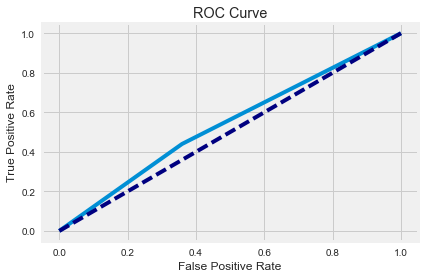

In [50]:
plt.plot(roc_curve(y_test, predicted)[0], roc_curve(y_test, predicted)[1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("ROC Curve")
print("The auc of ROC is: ")
roc_auc_score(y_test, predicted)


#### Area Under Curve gives similar accuracy as obtained above.

### Finally, we evaluate our model with cross-validation to see the average performance.

In [52]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[ 0.63235294  0.57352941  0.55882353  0.63235294  0.6119403   0.62686567
  0.64179104  0.56716418  0.64179104  0.71641791]
0.620302897278


Using cross validation we get the overall accuracy of 0.625

<font color='blue'>
### Conclusion

The model doesn’t perform well as the accuracy is only 62% at best.
This dataset requires too many dummie variables, which makes it harder to address the features influences. Use of other technique is recommended.

<font color='red'>
## Section 5: Model 2 -- Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

<font color='blue'>
### First Run - Default Parameters (no tuning)

In [55]:
# Model set up and run

model = RandomForestRegressor(n_estimators=200, oob_score=True, n_jobs=-1, random_state=102)

features = dta.columns.drop(['Finances'])
X = np.array(dta[features])
target = dta.Finances
y = np.array(target)

model.fit(X, y)

roc_auc_score(y, model.oob_prediction_)

0.69808018867924537

The auc of ROC is:  0.698080188679


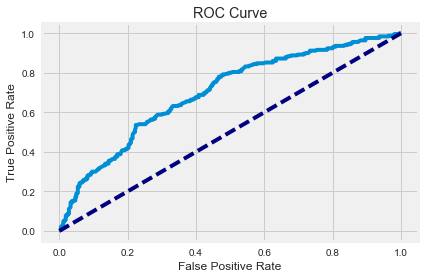

In [56]:
# Plot ROC curve
plt.plot(roc_curve(y, model.oob_prediction_)[0], roc_curve(y, model.oob_prediction_)[1])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
print("The auc of ROC is: ",roc_auc_score(y, model.oob_prediction_))

In [57]:
# Get and plot feature importance for all 149 features
model.feature_importances_

array([ 0.00374916,  0.0057219 ,  0.00606054,  0.00777658,  0.00867226,
        0.00597796,  0.00495377,  0.00520573,  0.00715192,  0.005376  ,
        0.00835668,  0.00479408,  0.00944587,  0.0043204 ,  0.00639404,
        0.00679777,  0.00475232,  0.00584669,  0.00737259,  0.00262521,
        0.00531461,  0.00510247,  0.00513027,  0.00727228,  0.00780788,
        0.00878521,  0.00557413,  0.00540578,  0.00539783,  0.00659342,
        0.00579212,  0.00514879,  0.00535542,  0.00844141,  0.00599743,
        0.00409215,  0.00304512,  0.00304716,  0.00732007,  0.00514012,
        0.00316816,  0.0048388 ,  0.00449986,  0.00413413,  0.00383524,
        0.00587361,  0.00469641,  0.00591382,  0.00607905,  0.00525954,
        0.00866838,  0.00502208,  0.00476516,  0.00505339,  0.00790584,
        0.00690237,  0.00553068,  0.00678697,  0.00490859,  0.00494835,
        0.00420406,  0.00549872,  0.00431741,  0.00478358,  0.00463812,
        0.00552077,  0.0062829 ,  0.00690895,  0.0062507 ,  0.00

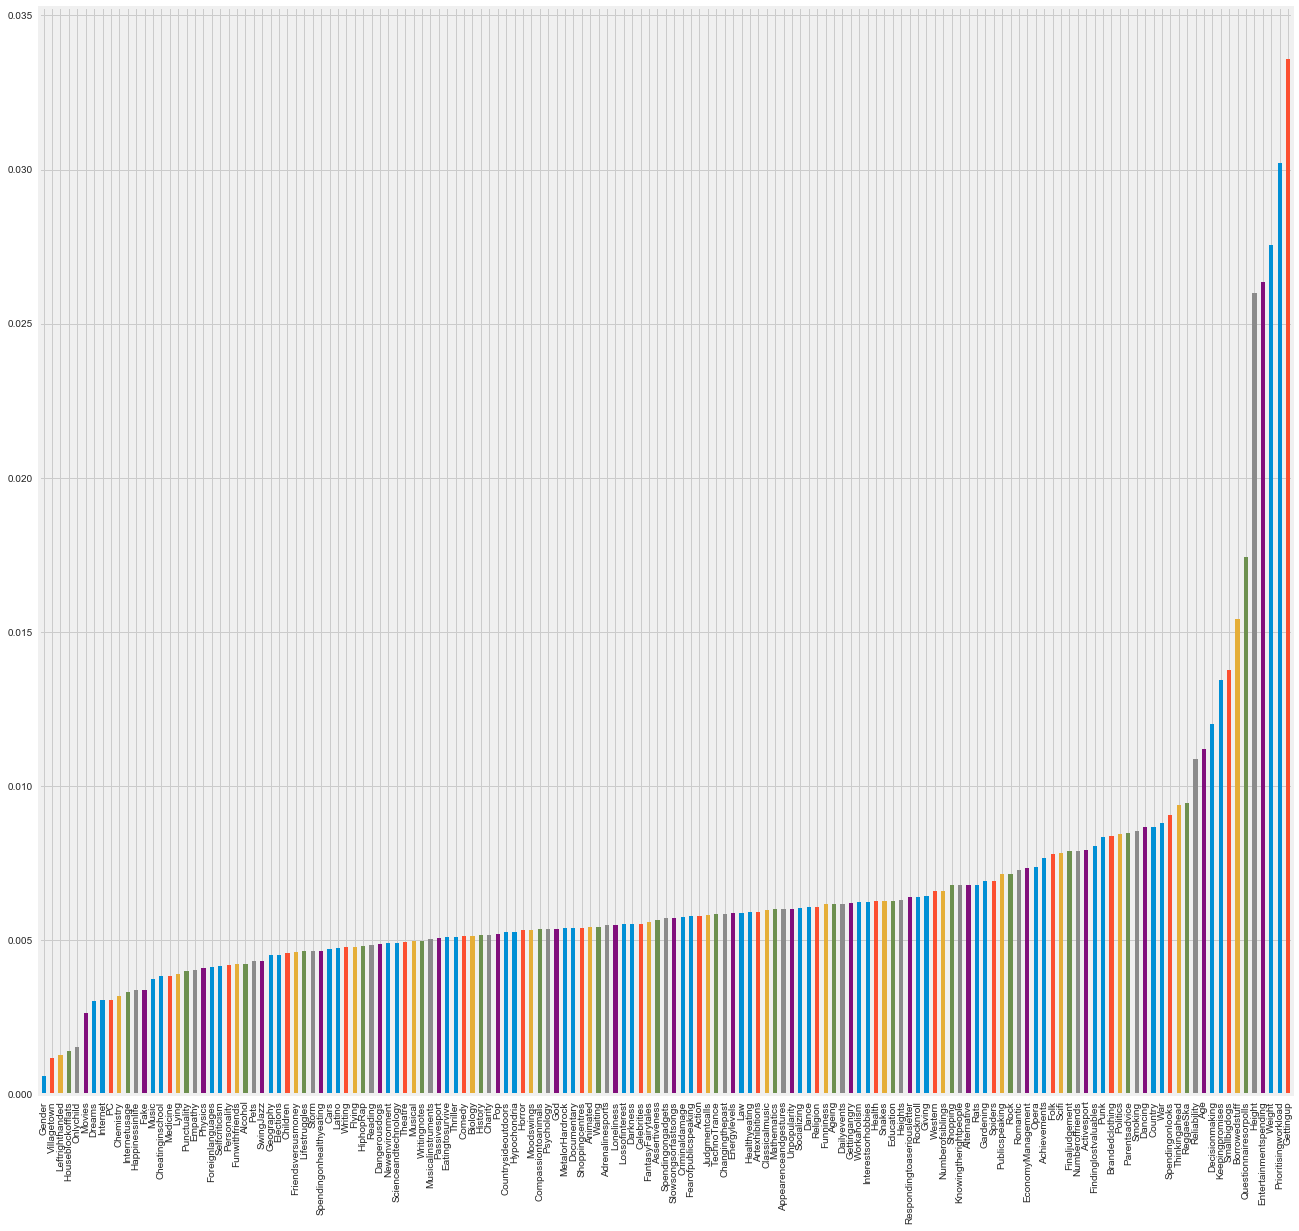

In [60]:
fImportance = pd.Series(model.feature_importances_, index=features)
fImportance = fImportance.sort_values()
fImportance.plot(kind="bar", figsize=(20,20))

The above plot would be used to suggest which variables to exclude if we decided to rerun the model with fewer variabels (the least important variables are those to the left of the plot)

To boost the trees accuracy we need to optimize the variables used in the model...

100 trees
iteration roc is: 0.669929245283
200 trees
iteration roc is: 0.698080188679
500 trees
iteration roc is: 0.68895754717
1000 trees
iteration roc is: 0.68845754717
2000 trees
iteration roc is: 0.694820754717


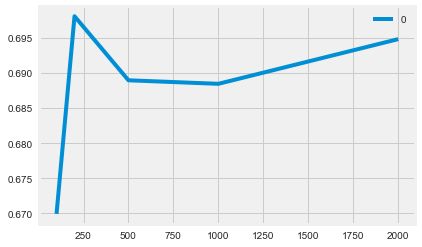

In [61]:
# To determine the best number of estimators
resultsList = []
my_n_estimator = [100, 200, 500, 1000, 2000]

for trees in my_n_estimator:
    model=RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=102)
    model.fit(X, y)
    print(trees, "trees")
    my_roc = roc_auc_score(y, model.oob_prediction_)
    print("iteration roc is:", my_roc)
    resultsList.append(my_roc)

pd.DataFrame(resultsList, my_n_estimator).plot();

<font color='blue'>
#### Parameter #1: Optimum n_estimator for RandomForest is 200

auto max features choice
iteration roc is: 0.698080188679
None max features choice
iteration roc is: 0.698080188679
0.9 max features choice
iteration roc is: 0.681061320755
sqrt max features choice
iteration roc is: 0.667518867925
log2 max features choice
iteration roc is: 0.688155660377


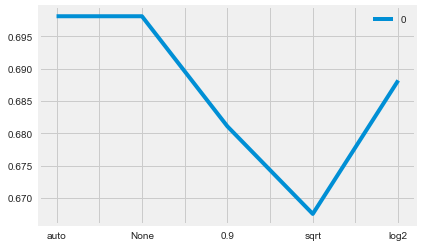

In [62]:
# To determine the best max features number
resultsList = []
max_fts = ["auto", None, 0.9, 'sqrt', 'log2']

for my_max_feature in max_fts:
    model=RandomForestRegressor(n_estimators=200, oob_score=True, n_jobs=-1, random_state=102, max_features=my_max_feature)
    model.fit(X, y)
    print(my_max_feature, "max features choice")
    my_roc = roc_auc_score(y, model.oob_prediction_)
    print("iteration roc is:", my_roc)
    resultsList.append(my_roc)

pd.DataFrame(resultsList, max_fts).plot();

<font color='blue'>
#### Parameter #2: It can be noted that using "auto" or "None" (i.e. use all the variables at any node split) gives the best results.

1 minimum sample leafs
iteration roc is: 0.698080188679
2 minimum sample leafs
iteration roc is: 0.688740566038
3 minimum sample leafs
iteration roc is: 0.69258490566
4 minimum sample leafs
iteration roc is: 0.695518867925
5 minimum sample leafs
iteration roc is: 0.701990566038
6 minimum sample leafs
iteration roc is: 0.695320754717
7 minimum sample leafs
iteration roc is: 0.693943396226
8 minimum sample leafs
iteration roc is: 0.691122641509
9 minimum sample leafs
iteration roc is: 0.690924528302
10 minimum sample leafs
iteration roc is: 0.686735849057


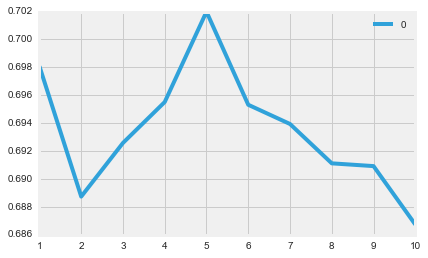

In [58]:
# To determine the best minimum sample leafs number
resultsList = []
my_min_sample_leaf = [1,2,3,4,5,6,7,8,9,10]

for min_sample in my_min_sample_leaf:
    model=RandomForestRegressor(n_estimators=200, oob_score=True, n_jobs=-1, random_state=102, max_features="auto", min_samples_leaf=min_sample)
    model.fit(X, y)
    print(min_sample, "minimum sample leafs")
    my_roc = roc_auc_score(y, model.oob_prediction_)
    print("iteration roc is:", my_roc)
    resultsList.append(my_roc)

pd.DataFrame(resultsList, my_min_sample_leaf).plot();

<font color='blue'>
#### Parameter #3: similarly, 5 is the optimum value for minimum sample leafs

<font color='blue'>
### Second Run - After Parameter Optimization

The auc of ROC is:  0.701990566038


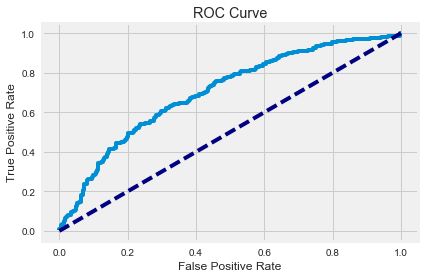

In [64]:
# Final model with optimized parameters
model = RandomForestRegressor(n_estimators=200, oob_score=True, n_jobs=-1, random_state=102, max_features="auto", min_samples_leaf=5)
model.fit(X, y)
roc_auc_score(y, model.oob_prediction_)

#sklearn.metrics.roc_curve(y, model.oob_prediction_, pos_label=None, sample_weight=None, drop_intermediate=True)[
plt.plot(roc_curve(y, model.oob_prediction_)[0], roc_curve(y, model.oob_prediction_)[1])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
print("The auc of ROC is: ",roc_auc_score(y, model.oob_prediction_))

As can be noticed, parameter optimization boosts the model accuracy to 70%, which is much better than the accuracy of the logistic regression model. However, there's one more model that could give even better results, the Extra Random Trees. 

Extra Random Trees: very similar to Random Forests, with the main difference being that while Random Forest algorithm tries to optimize the split at any given node, ERT splits at random

<font color='red'>
## Section 6: Model 3 -- Extra Random Trees Model

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

<font color='blue'>
### First Run - No Parameter Optimization

In [66]:
# Assign features and targets to variables
#os.chdir('/Users/askar/For Spyder/Decision Trees')
features = dta.columns.drop(['Finances'])
X = np.array(dta[features])
target = dta.Finances
y = np.array(target)

#### Train and Test the model: 70% training, 30% testing 

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=101)
# random_state: to get the same results when different users run the model
clf = ExtraTreesClassifier(n_estimators=2000, random_state=101)
# n_estimators: The number of trees in the forest, the higher the more accurate (and the more computationaly expensive) the algorithm is
clf.fit(X_train,y_train)
scores = cross_val_score(clf, X_train, y_train, cv=3,scoring='accuracy', n_jobs=-1)
print ("ExtraTreesClassifier -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

ExtraTreesClassifier -> cross validation accuracy: mean = 0.667 std = 0.006


In [69]:
## Fast parameter optimization with randomized search -- running this block may take a moment
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
param_dist = {"max_depth": [1,3,7,8,12,None],
            "max_features": ["auto"],
            "min_samples_split": [8,10,11,14,16,19],
            "min_samples_leaf": [1,2,3,4,5,6,7],
            "bootstrap": [True, False]}
# max_features: The number of features to consider when looking for the best split -- auto: the algorithm decides

# Here we specify the search settings, we use only 25 random parameter valuations but we manage to keep training times in check.
rsearch = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=25)
rsearch.fit(X_train,y_train)
rsearch.grid_scores_
bestclf=rsearch.best_estimator_
print(bestclf)

y_pred=bestclf.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is: \n", confusionMatrix)
accuracy=accuracy_score(y_test, y_pred)
print("Extra Trees accuracy is: ", accuracy)

/Users/askar/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
           oob_score=False, random_state=101, verbose=0, warm_start=False)
Confusion Matrix is: 
 [[127   3]
 [ 66   7]]
Extra Trees accuracy is:  0.660098522167


#### The initial accuracy without optimization is 66.5%. 

#### Now let's optimize the model and see if the result is going to improve

<font color='blue'>
### Second Run - After Parameter Optimization

In [71]:
from sklearn.datasets import fetch_covtype

dataset = fetch_covtype(random_state=111, shuffle=True)
dataset = fetch_covtype()

X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
del(X,y)
covtrain=np.c_[X_train,y_train]
covtest=np.c_[X_test,y_test]
np.savetxt('covtrain.csv', covtrain, delimiter=",")
np.savetxt('covtest.csv', covtest, delimiter=",")

#### To get subsamples of the training and testing sets, in a terminal, cd to current working directory and run following commands
`$ subsample --reservoir -n 10000 covtrain.csv > cov1.csv`

`$ subsample --reservoir -n 10000 covtrain.csv > cov2.csv`

`$ subsample --reservoir -n 10000 covtrain.csv > cov3.csv`

In [71]:
# Load sample 1

df = pd.read_csv('cov1.csv')
y=df[df.columns[54]]
X=df[df.columns[0:54]]

clf1=ExtraTreesClassifier(n_estimators=100, random_state=101,warm_start=True)
clf1.fit(X,y)
scores = cross_val_score(clf1, X, y, cv=3,scoring='accuracy', n_jobs=-1)
print ("ExtraTreesClassifier -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))
print (scores)
print ('amount of trees in the model: %s' % len(clf1.estimators_))

ExtraTreesClassifier -> cross validation accuracy: mean = 0.799 std = 0.001
[ 0.7982009   0.80048005  0.7988592 ]
amount of trees in the model: 100


In [72]:
# load sample 2

df = pd.read_csv('cov2.csv')
y=df[df.columns[54]]
X=df[df.columns[0:54]]
clf1.set_params(n_estimators=150, random_state=101,warm_start=True)
clf1.fit(X,y)
scores = cross_val_score(clf1, X, y, cv=3,scoring='accuracy', n_jobs=-1)
print ("ExtraTreesClassifier after params -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))
print (scores)
print ('amount of trees in the model: %s' % len(clf1.estimators_))

ExtraTreesClassifier after params -> cross validation accuracy: mean = 0.797 std = 0.008
[ 0.80155875  0.80378038  0.78498498]
amount of trees in the model: 150


In [73]:
# load sample 3

df = pd.read_csv('cov3.csv')
y=df[df.columns[54]]
X=df[df.columns[0:54]]
clf1.set_params(n_estimators=200, random_state=101,warm_start=True)
clf1.fit(X,y)
scores = cross_val_score(clf1, X, y, cv=3,scoring='accuracy', n_jobs=-1)
print ("ExtraTreesClassifier after params -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))
print (scores)
print ('amount of trees in the model: %s' % len(clf1.estimators_))

ExtraTreesClassifier after params -> cross validation accuracy: mean = 0.806 std = 0.005
[ 0.81180701  0.80636446  0.79855899]
amount of trees in the model: 200


In [74]:
# Now let's predict our combined model on the test set and check our score.
df = pd.read_csv('covtest.csv')
X=df[df.columns[0:54]]
y=df[df.columns[54]]
pred2=clf1.predict(X)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, pred2)
print ("final test score %r" % accuracy)

final test score 0.83614739849572295


As can be seen, a significant improvement in the accuracy was obtained as a result of using Extra Random Trees as opposed to Random Forest or Logistic Regression. The accuracy is now 83.6%. It was then decided that Extra Random Trees is our main model to work with in this case study, other models are only used to illustrate the accuracy improvement in transition from logistic regression to Random Forest, and from Random Forest to Extra Random Trees.

**This model's accuracy may vary depending on the randomly created subsample**